In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Raw Data Loading
df = pd.read_csv('./data/mnist/train.csv')
# display(df.shape) # (42000, 785)
# display(df.head())

(42000, 785)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


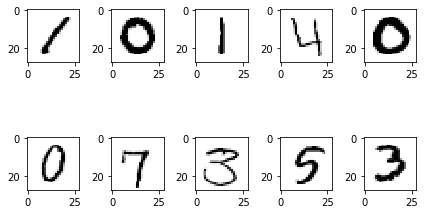

In [3]:
# 데이터 전처리 : 결측치나 이상치 없음. 단, 정규화는 필요함

# 이미지 확인
figure = plt.figure()
ax_arr = [] # python list

img_data = df.drop('label', axis=1, inplace=False).values

for n in range(10):
    ax_arr.append(figure.add_subplot(2,5,n+1))
    ax_arr[n].imshow(img_data[n].reshape(28,28), # 28 x 28 픽셀로 변환
                     cmap='Greys', # cmap은 흑백 이미지 처리
                     interpolation='nearest') # interpolation는 보간법(이미지 깨지지 않도록)
    
plt.tight_layout()
plt.show()

In [4]:
# Data Split
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False), df['label'], test_size=0.3, random_state=1, stratify=df['label'])

# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

In [8]:
import warnings
warnings.filterwarnings('ignore')

# Tensorflow Implementation
sess = tf.Session()

onehot_train_t_data = sess.run(tf.one_hot(train_t_data, depth=10)) # class가 0 ~ 9까지 총 10개
onehot_test_t_data = sess.run(tf.one_hot(test_t_data, depth=10))

# Placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32) # 독립변수(feature)의 개수
T = tf.placeholder(shape=[None,10], dtype=tf.float32) # class의 logistic 개수

# Weight, bias
W = tf.Variable(tf.random.normal([784,10])) # 독립변수 2개, W 3개. W는 7840개
b = tf.Variable(tf.random.normal([10])) # = logistic 개수

# Model, Hypothesis
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

# Cross Entropy(loss func)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=T))

# Train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-1).minimize(loss)

# Session 초기화
sess.run(tf.global_variables_initializer())

# 반복 학습
num_of_epoch = 1000
batch_size = 100

for step in range(num_of_epoch):
    total_batch = int(norm_train_x_data.shape[0] / batch_size) # 학습 데이터의 개수 / batch
    
    for i in range(total_batch):
        batch_x = norm_train_x_data[i*batch_size:(i+1)*batch_size] # [0:100], [100:200] ~. 100개씩 Slicing
        batch_y = onehot_train_t_data[i*batch_size:(i+1)*batch_size]
        _, loss_val = sess.run([train, loss], feed_dict={X:batch_x, T:batch_y})
        
    if step % 100 == 0:
        print('loss val : {}'.format(loss_val))

loss val : 1.3581478595733643
loss val : 0.32358238101005554
loss val : 0.291931688785553
loss val : 0.2713947594165802
loss val : 0.2546168267726898
loss val : 0.2409151792526245
loss val : 0.2298405021429062
loss val : 0.22098416090011597
loss val : 0.21395885944366455
loss val : 0.2084009349346161


In [10]:
# 성능평가(Accuracy)
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(T,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

accuracy_val = sess.run(accuracy, feed_dict={X:norm_test_x_data, T:onehot_test_t_data})
print('Accuracy : {}'.format(accuracy_val)) # 0.9070634841918945

Accuracy : 0.9070634841918945


In [15]:
import tensorflow as tf

print(tf.__version__)

W = tf.random.normal([1], dtype=tf.float32)

print(W.numpy())

2.3.0
[1.3611453]


In [ ]:
# Keras의 model 만들기의 순서

import tensorflow as tf

# model = tf.keras.models.Sequential()

# model.add('input layer') # layer 추가
# model.add('output layer')

# model.compile() # loss의 종류와 optimizer 종류를 설정

# model.fit() # 학습(마치 Sklearn 사용하는 것처럼)

# model.evaluate() # 평가와 predict
# model.predict()

# model.save() # model 저장

In [22]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [24]:
# Multinomial Classification by Tensorflow Ver. 2.0 - MNIST

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense # Flatten는 input layer, Dense는 output layer용
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Raw Data Loading
df = pd.read_csv('./data/mnist/train.csv')

# Data Split
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3,
                 random_state=1,
                 stratify=df['label'])

# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

In [25]:
# Tensorflow 2.x 구현

# model 생성
model = Sequential()

# layer 추가
model.add(Flatten(input_shape=(norm_train_x_data.shape[1],))) # input layer. 튜플로 입력
model.add(Dense(units=10, activation='softmax')) # output layer. class와 logistic의 개수는 10

# print(model.summary()) # 구해야 할 W의 개수(7850)를 알려줌

In [26]:
# model compile : 사용할 loss 함수를 지정, 사용할 optimizer(알고리즘)를 지정

from tensorflow.keras.optimizers import SGD

# loss
# linear regression : linear(MSE)
# binary classification : binary_crossentropy
# multinomial classification : categorical_crossentropy

model.compile(optimizer=SGD(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy', # sparse로 원핫인코딩 처리까지
              metrics=['accuracy'])

# 학습 결과를 변수에 저장
history = model.fit(norm_train_x_data, train_t_data,
                    epochs=100, batch_size=100,
                    verbose=1, validation_split=0.2) # val_accuracy가 높아야! verbose는 출력 여부

Epoch 1/100
236/236 [==============================] - 0s 2ms/step - loss: 2.1449 - accuracy: 0.2542 - val_loss: 2.0314 - val_accuracy: 0.3293
Epoch 2/100
236/236 [==============================] - 0s 1ms/step - loss: 1.9380 - accuracy: 0.4080 - val_loss: 1.8467 - val_accuracy: 0.4815
Epoch 3/100
236/236 [==============================] - 0s 1ms/step - loss: 1.7694 - accuracy: 0.5453 - val_loss: 1.6929 - val_accuracy: 0.6031
Epoch 4/100
236/236 [==============================] - 0s 1ms/step - loss: 1.6283 - accuracy: 0.6324 - val_loss: 1.5636 - val_accuracy: 0.6597
Epoch 5/100
236/236 [==============================] - 0s 1ms/step - loss: 1.5094 - accuracy: 0.6773 - val_loss: 1.4546 - val_accuracy: 0.6976
Epoch 6/100
236/236 [==============================] - 0s 1ms/step - loss: 1.4090 - accuracy: 0.7065 - val_loss: 1.3621 - val_accuracy: 0.7223
Epoch 7/100
236/236 [==============================] - 0s 1ms/step - loss: 1.3234 - accuracy: 0.7293 - val_loss: 1.2832 - val_accuracy: 0.7417

Epoch 58/100
236/236 [==============================] - 0s 1ms/step - loss: 0.5449 - accuracy: 0.8685 - val_loss: 0.5463 - val_accuracy: 0.8696
Epoch 59/100
236/236 [==============================] - 0s 1ms/step - loss: 0.5418 - accuracy: 0.8691 - val_loss: 0.5433 - val_accuracy: 0.8694
Epoch 60/100
236/236 [==============================] - 0s 1ms/step - loss: 0.5388 - accuracy: 0.8695 - val_loss: 0.5404 - val_accuracy: 0.8697
Epoch 61/100
236/236 [==============================] - 0s 1ms/step - loss: 0.5358 - accuracy: 0.8699 - val_loss: 0.5376 - val_accuracy: 0.8701
Epoch 62/100
236/236 [==============================] - 0s 1ms/step - loss: 0.5330 - accuracy: 0.8702 - val_loss: 0.5348 - val_accuracy: 0.8701
Epoch 63/100
236/236 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.8709 - val_loss: 0.5321 - val_accuracy: 0.8702
Epoch 64/100
236/236 [==============================] - 0s 1ms/step - loss: 0.5275 - accuracy: 0.8711 - val_loss: 0.5295 - val_accuracy:

In [27]:
# 최종 평가
print(model.evaluate(norm_test_x_data, test_t_data))

394/394 [==============================] - 0s 676us/step - loss: 0.4788 - accuracy: 0.8767
[0.4787802994251251, 0.8767460584640503]


In [28]:
# 모델 저장

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense # Flatten는 input layer, Dense는 output layer용
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

# Raw Data Loading
df = pd.read_csv('./data/mnist/train.csv')

# 기존에는 test_x_data, test_t_data 이 두 데이터를 validation 용도로 사용함. 이제는 test 용도로 사용할 것
# Keras는 학습할 때 train data를 일정 부분 나누어 자체 평가가 가능

# Data Split
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3,
                 random_state=1,
                 stratify=df['label'])

# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

# loss 함수를 sparse_categorical_crossentropy로 지정할 것이기 때문에 label에 대한 one-hot endoding 처리가 필요 없음

# model 생성
model = Sequential()

# layer 추가
model.add(Flatten(input_shape=(norm_train_x_data.shape[1],))) # input layer. 튜플로 입력
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model 저장. 구조 빼고 checkpoint 이용해 W, b만 저장. 어디에 저장할지 알려줌
checkpoint_path = './training_ckpt/cp.ckpt'
cp_callback = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

# 학습 결과를 변수에 저장
history = model.fit(norm_train_x_data, train_t_data,
                    epochs=100, batch_size=100,
                    verbose=1, validation_split=0.2, # verbose=0이면 출력 안됨
                    callbacks=[cp_callback]) # 학습할 때마다 W를 저장하라

# 최종 평가
print(model.evaluate(norm_test_x_data, test_t_data)) # loss: 0.4814 - accuracy: 0.8759

Epoch 1/100
185/236 [======================>.......] - ETA: 0s - loss: 2.3350 - accuracy: 0.1027
Epoch 00001: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 1s 2ms/step - loss: 2.3049 - accuracy: 0.1175 - val_loss: 2.1652 - val_accuracy: 0.2044
Epoch 2/100
228/236 [===========================>..] - ETA: 0s - loss: 2.0540 - accuracy: 0.3075
Epoch 00002: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 1ms/step - loss: 2.0508 - accuracy: 0.3110 - val_loss: 1.9493 - val_accuracy: 0.4158
Epoch 3/100
193/236 [=======================>......] - ETA: 0s - loss: 1.8753 - accuracy: 0.4860
Epoch 00003: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 1ms/step - loss: 1.8588 - accuracy: 0.4997 - val_loss: 1.7767 - val_accuracy: 0.5626
Epoch 4/100
224/236 [===========================>..] - ETA: 0s - loss: 1.7057 - accuracy: 0.6117
Epoch 00004: saving model to ./training_ckpt\cp.ckpt
236/236

213/236 [==========================>...] - ETA: 0s - loss: 0.7004 - accuracy: 0.8447
Epoch 00030: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 1ms/step - loss: 0.7001 - accuracy: 0.8445 - val_loss: 0.6966 - val_accuracy: 0.8440
Epoch 31/100
208/236 [=========================>....] - ETA: 0s - loss: 0.6896 - accuracy: 0.8450
Epoch 00031: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.8459 - val_loss: 0.6876 - val_accuracy: 0.8449
Epoch 32/100
234/236 [============================>.] - ETA: 0s - loss: 0.6823 - accuracy: 0.8467
Epoch 00032: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.8470 - val_loss: 0.6790 - val_accuracy: 0.8454
Epoch 33/100
202/236 [========================>.....] - ETA: 0s - loss: 0.6761 - accuracy: 0.8478
Epoch 00033: saving model to ./training_ckpt\cp.ckpt
236/236 [=======

214/236 [==========================>...] - ETA: 0s - loss: 0.5434 - accuracy: 0.8688
Epoch 00059: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 1ms/step - loss: 0.5436 - accuracy: 0.8688 - val_loss: 0.5454 - val_accuracy: 0.8645
Epoch 60/100
229/236 [============================>.] - ETA: 0s - loss: 0.5413 - accuracy: 0.8690
Epoch 00060: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 1ms/step - loss: 0.5406 - accuracy: 0.8691 - val_loss: 0.5424 - val_accuracy: 0.8650
Epoch 61/100
199/236 [========================>.....] - ETA: 0s - loss: 0.5397 - accuracy: 0.8693
Epoch 00061: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.8699 - val_loss: 0.5396 - val_accuracy: 0.8653
Epoch 62/100
221/236 [===========================>..] - ETA: 0s - loss: 0.5368 - accuracy: 0.8696
Epoch 00062: saving model to ./training_ckpt\cp.ckpt
236/236 [=======

Epoch 88/100
197/236 [========================>.....] - ETA: 0s - loss: 0.4758 - accuracy: 0.8816
Epoch 00088: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.8788 - val_loss: 0.4836 - val_accuracy: 0.8759
Epoch 89/100
231/236 [============================>.] - ETA: 0s - loss: 0.4775 - accuracy: 0.8795
Epoch 00089: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.8792 - val_loss: 0.4821 - val_accuracy: 0.8762
Epoch 90/100
212/236 [=========================>....] - ETA: 0s - loss: 0.4751 - accuracy: 0.8796
Epoch 00090: saving model to ./training_ckpt\cp.ckpt
236/236 [==============================] - 0s 1ms/step - loss: 0.4764 - accuracy: 0.8795 - val_loss: 0.4807 - val_accuracy: 0.8765
Epoch 91/100
191/236 [=======================>......] - ETA: 0s - loss: 0.4745 - accuracy: 0.8788
Epoch 00091: saving model to ./training_ckpt\cp.ckpt
236

In [ ]:
%reset

In [29]:
# 저장한 model 불러서 다시 사용하기
# 1. 학습하지 않은 상태로 evaluation 진행 -> 좋지 않은 결과
# 2. checkpoint에 있는 W를 load한 후 model을 재설정하고 평가 -> 좋은 결과

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense # Flatten는 input layer, Dense는 output layer용
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

# Raw Data Loading
df = pd.read_csv('./data/mnist/train.csv')

# 기존에는 test_x_data, test_t_data 이 두 데이터를 validation 용도로 사용함. 이제는 test 용도로 사용할 것
# Keras는 학습할 때 train data를 일정 부분 나누어 자체 평가가 가능

# Data Split
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3,
                 random_state=1,
                 stratify=df['label'])

# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

# loss를 sparse_categorical_crossentropy로 지정할 것이기 때문에 one-hot endoding 처리가 필요 없음

# model 생성
model = Sequential()

# layer 추가
model.add(Flatten(input_shape=(norm_train_x_data.shape[1],))) # input layer. 튜플로 입력
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 학습 없이 최종 평가
print(model.evaluate(norm_test_x_data, test_t_data)) # accuracy: 0.0706. 정확도 7%

Once deleted, variables cannot be recovered. Proceed (y/[n])? ㅛ
Once deleted, variables cannot be recovered. Proceed (y/[n])? y
394/394 [==============================] - 0s 709us/step - loss: 2.3833 - accuracy: 0.0706
[2.383298873901367, 0.07055555284023285]


In [30]:
# 2. checkpoint에 있는 W를 load한 후 model을 재설정하고 평가 -> 좋은 결과

checkpoint_path = './training_ckpt/cp.ckpt'
model.load_weights(checkpoint_path)
print(model.evaluate(norm_test_x_data, test_t_data)) # accuracy: 0.8759. 정확도 87%

394/394 [==============================] - 0s 651us/step - loss: 0.4814 - accuracy: 0.8759
[0.4814387261867523, 0.8758730292320251]
